## Different Plot Types

In [32]:
from matplotlib import pyplot as plt

### Simple Bar Chart
The `plt.bar` function allows you to create simple bar charts to compare multiple categories of data.

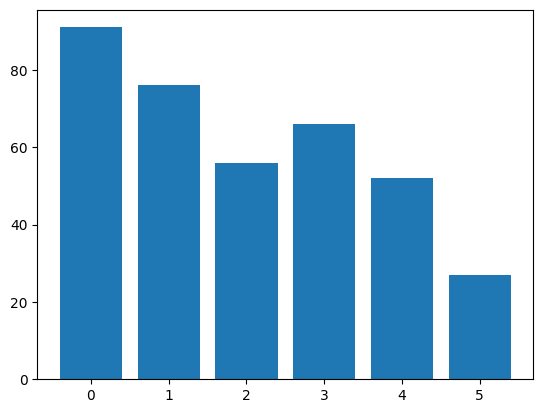

In [33]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales =  [91, 76, 56, 66, 52, 27]

plt.bar(range(len(sales)), sales)
plt.show()

When we create a bar chart, we want each bar to be meaningful and correspond to a category of data. In the `drinks` chart, we could see that sales were different for different drink items, but this wasn’t very helpful to us, since we didn’t know which bar corresponded to which drink.

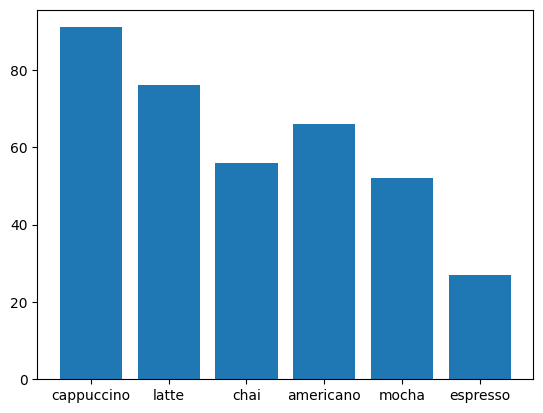

In [34]:
plt.bar(range(len(drinks)), sales)

ax = plt.subplot()
ax.set_xticks(range(6))
ax.set_xticklabels(drinks)
plt.show()

### Side-By-Side Bars

We can use a bar chart to compare two sets of data with the same types of axis values. To do this, we plot two sets of bars next to each other, so that the values of each category can be compared.


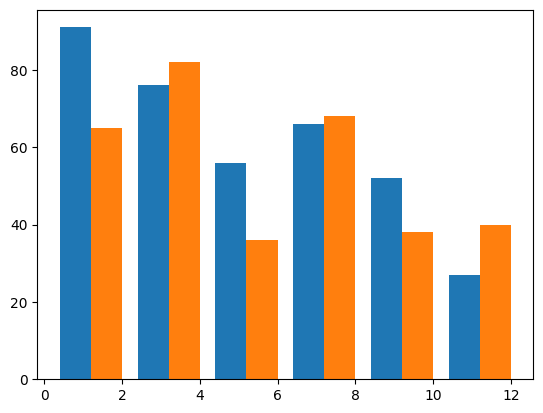

In [35]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 = [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]

n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store1_x = [t*element + w*n for element in range(d)]
plt.bar(store1_x, sales1)

n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
store2_x = [t*element + w*n for element in range(d)]
plt.bar(store2_x, sales2)

plt.show()


### Stacked Bars

If we want to compare two sets of data while preserving knowledge of the total between them, we can also stack the bars instead of putting them side by side. For instance, if someone was plotting the hours they’ve spent on entertaining themselves with video games and books in the past week, and wanted to also get a feel for total hours spent on entertainment, they could create a stacked bar chart:

We do this by using the keyword `bottom`. The top set of bars will have `bottom` set to the heights of the other set of bars. So the first set of bars is plotted normally:

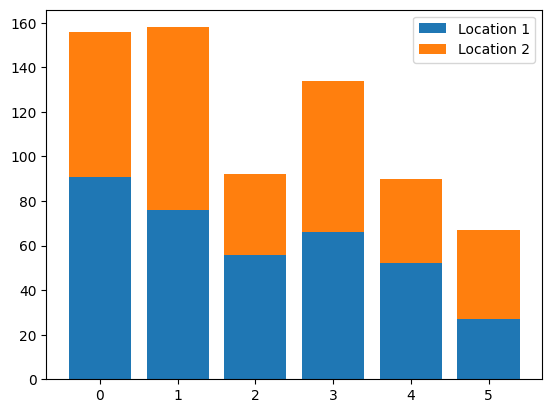

In [36]:
plt.bar(range(len(drinks)), sales1)
plt.bar(range(len(drinks)), sales2, bottom=sales1)

plt.legend(["Location 1", "Location 2"])

plt.show()

### Error Bars

To display error visually in a bar chart, we often use error bars to show where each bar could be, taking errors into account.

If we wanted to show an error of +/- 2, we would add the keyword yerr=2 to our `plt.bar` command. To make the caps wide and easy to read, we would add the keyword `capsize=10`:

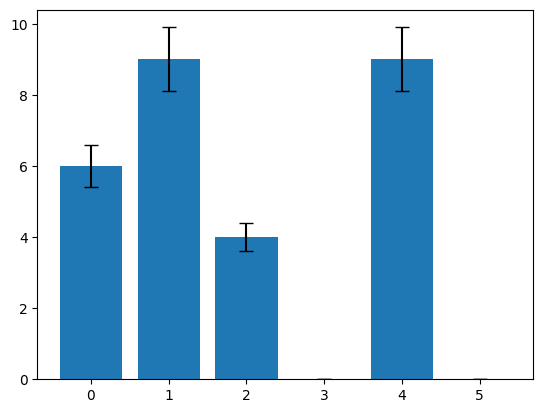

In [37]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
ounces_of_milk = [6, 9, 4, 0, 9, 0]
error = [0.6, 0.9, 0.4, 0, 0.9, 0]

# Plot the bar graph
plt.bar(range(len(drinks)), ounces_of_milk, yerr=error, capsize=5)

plt.show()

### Fill Between

We’ve learned how to display errors on bar charts using error bars. Let’s take a look at how we might do this in an aesthetically pleasing way on line graphs. In Matplotlib, we can use `plt.fill_between()` to shade error. This function takes three arguments:

1. x-values — this works just like the x-values of plt.plot()
2. lower-bound for y-values — sets the bottom of the shaded area
3. upper-bound for y-values — sets the top of the shaded area


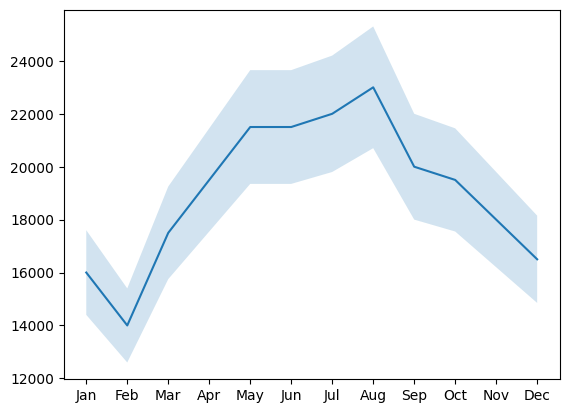

In [38]:
months = range(12)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
revenue = [16000, 14000, 17500, 19500, 21500, 21500, 22000, 23000, 20000, 19500, 18000, 16500]

plt.plot(months, revenue)

ax = plt.subplot()
ax.set_xticks(months)
ax.set_xticklabels(month_names)

y_upper = [i + (i*0.10) for i in revenue]
y_lower = [i - (i*0.10) for i in revenue]

plt.fill_between(months, y_lower, y_upper, alpha=0.2)

plt.show()

### Pie Chart

If we want to display elements of a data set as proportions of a whole, we can use a pie chart.

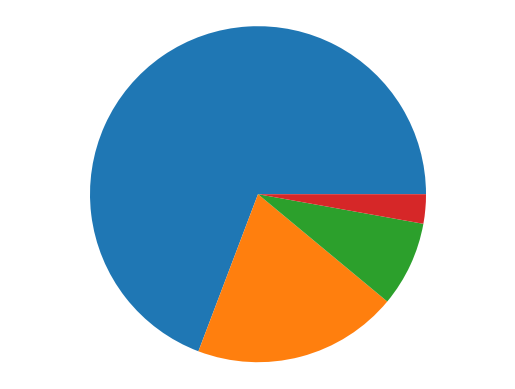

In [39]:
payment_method_names = ["Card Swipe", "Cash", "Apple Pay", "Other"]
payment_method_freqs = [270, 77, 32, 11]

plt.pie(payment_method_freqs)
plt.axis('equal')

plt.show()

#### Pie Chart Labeling

We also want to be able to understand what each slice of the pie represents. To do this, we can either:

- use a legend to label each color, or
- put labels on the chart itself.


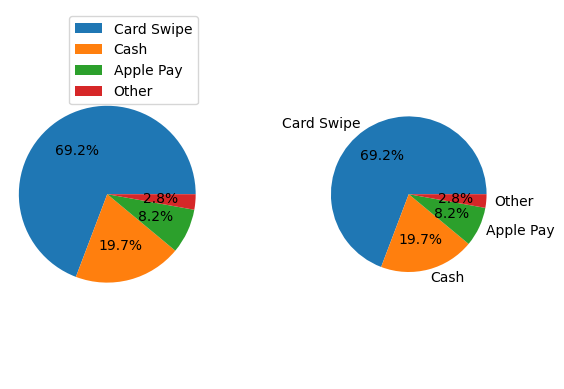

In [40]:
plt.subplot(1,2,1)
plt.pie(payment_method_freqs, autopct="%0.1f%%")
plt.axis('equal')
plt.legend(payment_method_names)

plt.subplot(1,2,2)
plt.pie(payment_method_freqs, autopct="%0.1f%%", labels=payment_method_names)

plt.subplots_adjust(wspace= 0.55)
plt.show()

### Histogram

Sometimes we want to get a feel for a large dataset with many samples beyond knowing just the basic metrics of mean, median, or standard deviation. To get more of an intuitive sense for a dataset, we can use a histogram to display all the values.

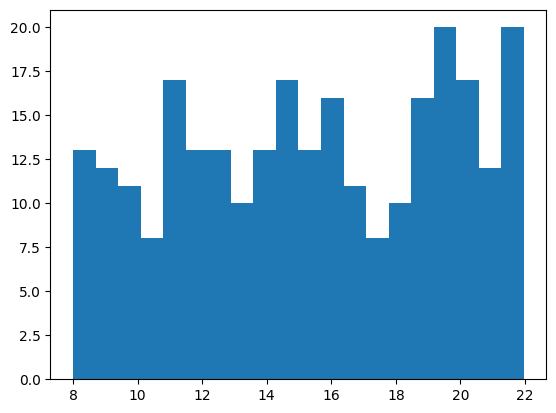

In [41]:
import csv

def convert_time_to_num(time):
  mins = int(time[-2:])
  frac_of_hour = mins/60.0
  hour = int(time[:-3])
  time = hour + frac_of_hour
  return time

sales_times_raw = []
with open('./csv/sales_times.csv') as csvDataFile:
  csvReader = csv.reader(csvDataFile)
  for row in csvReader:
    sales_times_raw.append(row[2])
  sales_times_raw = sales_times_raw[1:]

sales_times = []
for time in sales_times_raw:
  sales_times.append(convert_time_to_num(time))

plt.hist(sales_times, bins=20)
plt.show()

#### Multiple Histograms
If we want to compare two different distributions, we can put multiple histograms on the same plot. This could be useful, for example, in comparing the heights of a bunch of men and the heights of a bunch of women. However, it can be hard to read two histograms on top of each other. 

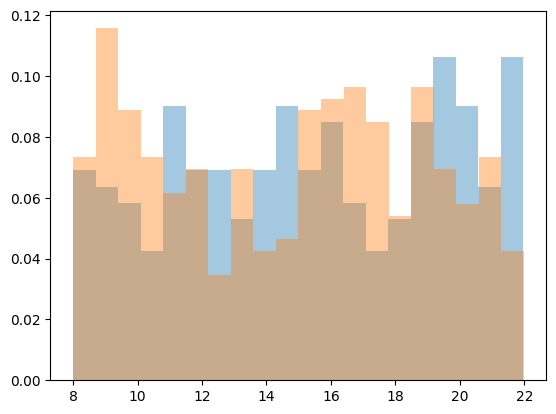

In [42]:
sales_times2_raw = []
with open('./csv/sales_times_s2.csv') as csvDataFile:
  csvReader = csv.reader(csvDataFile)
  for row in csvReader:
    sales_times2_raw.append(row[2])
  sales_times2_raw = sales_times2_raw[1:]

sales_times2 = []
for time in sales_times2_raw:
  sales_times2.append(convert_time_to_num(time))

plt.hist(sales_times, bins=20, alpha=0.4, density=True)
#plot your other histogram here
plt.hist(sales_times2, bins=20, alpha=0.4, density=True)

plt.show()